# WeatherPy

---

## Generate Random Geographic Coordinates and a List of More than 500 Cities

In [14]:
# Dependencies and Setup

import string
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import requests
import time
from scipy.stats import linregress

# path for the api_keys file
import sys
sys.path.append("../")

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List Using the "citipy" Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Python "zip()" will combine two lists into one list of tuples
# We want at least 500 cities but need to account for duplicates
# or no city present in the initial set of lat/longs requested

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm there are a sufficient number of cities

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the random cities list generated

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
# Get temp in Celsius, per project requirements
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to display to create a log
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
# The default "start" value for enumerate() is zero, appropriate
# for iterating through an array.   The random city generator
# code was provided in the stater code

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # There is also a limit on requests per 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    # if no mode is specified, the default returned is json
    city_url = query_url + city
    
    # Print the city, record, and set numbers to keep user informed
    # of progress as the data is being retrieved
    
    print(f"Processing Record {record_count} of Set {set_count} for city {city}")
    
    # increment the record count
    record_count += 1

    # Run an API request for the city
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']["temp_max"])
        city_humidity = (city_weather['main']["humidity"])
        city_clouds = (city_weather['clouds']["all"])
        city_wind = (city_weather['wind']["speed"])
        city_country = (city_weather['sys']["country"])
        city_date = (city_weather['dt'])

        # Append the city information to the city_data list
        # Appending in this way will add
        # the information for this city as one entry
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error occurs, skip this city
    except:

        print("City not found.  Skipping it...")
        pass
              
# Indicate that data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 for city olonkinbyen
Processing Record 2 of Set 1 for city bilibino
Processing Record 3 of Set 1 for city eydhafushi
Processing Record 4 of Set 1 for city san luis de la loma
Processing Record 5 of Set 1 for city ancud
Processing Record 6 of Set 1 for city chonchi
Processing Record 7 of Set 1 for city chimore
Processing Record 8 of Set 1 for city grytviken
Processing Record 9 of Set 1 for city adamstown
Processing Record 10 of Set 1 for city st. john's
Processing Record 11 of Set 1 for city mukalla
Processing Record 12 of Set 1 for city longyearbyen
Processing Record 13 of Set 1 for city letlhakeng
Processing Record 14 of Set 1 for city paso de los libres
Processing Record 15 of Set 1 for city margaret river
Processing Record 16 of Set 1 for city concepcion
Processing Record 17 of Set 1 for city ushuaia
Processing Record 18 of Set 1 for city kapa'a
Processing Record 19

Processing Record 10 of Set 4 for city weno
Processing Record 11 of Set 4 for city sosnogorsk
Processing Record 12 of Set 4 for city harar
Processing Record 13 of Set 4 for city andergrove
Processing Record 14 of Set 4 for city howrah
Processing Record 15 of Set 4 for city isafjordur
Processing Record 16 of Set 4 for city kokopo
Processing Record 17 of Set 4 for city al burayqah
Processing Record 18 of Set 4 for city saint-philippe
Processing Record 19 of Set 4 for city constantia
Processing Record 20 of Set 4 for city undurkhaan
Processing Record 21 of Set 4 for city sangola
Processing Record 22 of Set 4 for city irtyshsk
Processing Record 23 of Set 4 for city brookings
Processing Record 24 of Set 4 for city tadine
Processing Record 25 of Set 4 for city bubaque
Processing Record 26 of Set 4 for city nar'yan-mar
Processing Record 27 of Set 4 for city bayan nur
City not found.  Skipping it...
Processing Record 28 of Set 4 for city kawthoung
City not found.  Skipping it...
Processing Rec

Processing Record 26 of Set 7 for city bamboo flat
Processing Record 27 of Set 7 for city menongue
Processing Record 28 of Set 7 for city fujinomiya
Processing Record 29 of Set 7 for city san mariano
Processing Record 30 of Set 7 for city zhangjiakou
Processing Record 31 of Set 7 for city chernomorskoye
Processing Record 32 of Set 7 for city paimpol
Processing Record 33 of Set 7 for city tazovsky
Processing Record 34 of Set 7 for city brigantine
Processing Record 35 of Set 7 for city vila franca do campo
Processing Record 36 of Set 7 for city happy valley-goose bay
Processing Record 37 of Set 7 for city yichang
Processing Record 38 of Set 7 for city minas de marcona
Processing Record 39 of Set 7 for city whitby
Processing Record 40 of Set 7 for city andkhoy
Processing Record 41 of Set 7 for city castanos
Processing Record 42 of Set 7 for city bargara
City not found.  Skipping it...
Processing Record 43 of Set 7 for city barranca
Processing Record 44 of Set 7 for city nyala
Processing R

Processing Record 40 of Set 10 for city qurayyat
Processing Record 41 of Set 10 for city kozel'sk
Processing Record 42 of Set 10 for city lusambo
Processing Record 43 of Set 10 for city huarmey
Processing Record 44 of Set 10 for city newnham
Processing Record 45 of Set 10 for city hami
Processing Record 46 of Set 10 for city kizner
Processing Record 47 of Set 10 for city kyzyl-suu
Processing Record 48 of Set 10 for city ciudad lazaro cardenas
Processing Record 49 of Set 10 for city yangor
City not found.  Skipping it...
Processing Record 0 of Set 11 for city pokhara
Processing Record 1 of Set 11 for city moires
Processing Record 2 of Set 11 for city leyte
Processing Record 3 of Set 11 for city pierre
Processing Record 4 of Set 11 for city lucapa
Processing Record 5 of Set 11 for city labuan bajo
Processing Record 6 of Set 11 for city chul'man
Processing Record 7 of Set 11 for city mancora
Processing Record 8 of Set 11 for city vizinga
Processing Record 9 of Set 11 for city hammerfest
P

In [4]:
# Create a Pandas DataFrame with the cities weather data 

city_data_df = pd.DataFrame(city_data)

# Display record counts
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample of the city data

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.86,100,100,4.22,SJ,1683687798
1,bilibino,68.0546,166.4372,-2.51,80,100,1.84,RU,1683687798
2,eydhafushi,5.1033,73.0708,28.70,77,98,5.42,MV,1683687799
3,san luis de la loma,17.2706,-100.8939,27.75,72,0,1.08,MX,1683687636
4,ancud,-41.8697,-73.8203,10.80,95,87,2.02,CL,1683687799
5,chonchi,-42.6128,-73.8092,12.56,98,99,0.60,CL,1683687208
6,chimore,-16.9833,-65.1333,18.61,98,50,0.54,BO,1683687201
7,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683687800
8,adamstown,-25.0660,-130.1015,21.72,59,90,5.59,PN,1683687800
9,st. john's,47.5649,-52.7093,4.98,79,75,15.95,CA,1683687214


In [6]:
# Export the city data into a csv file
# Create a unique index for the city

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data with its added City_ID indext

city_data_in_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.86,100,100,4.22,SJ,1683687798
1,bilibino,68.0546,166.4372,-2.51,80,100,1.84,RU,1683687798
2,eydhafushi,5.1033,73.0708,28.70,77,98,5.42,MV,1683687799
3,san luis de la loma,17.2706,-100.8939,27.75,72,0,1.08,MX,1683687636
4,ancud,-41.8697,-73.8203,10.80,95,87,2.02,CL,1683687799
5,chonchi,-42.6128,-73.8092,12.56,98,99,0.60,CL,1683687208
6,chimore,-16.9833,-65.1333,18.61,98,50,0.54,BO,1683687201
7,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683687800
8,adamstown,-25.0660,-130.1015,21.72,59,90,5.59,PN,1683687800
9,st. john's,47.5649,-52.7093,4.98,79,75,15.95,CA,1683687214


### Create the Requested Scatter Plots

#### Latitude vs. Temperature

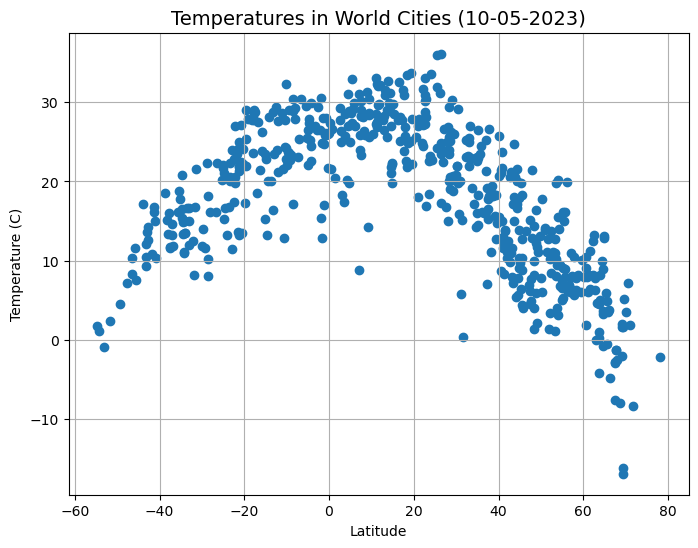

In [8]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Temperatures in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1_Lat_Humidity.png")

# Show plot
plt.show()


#### Latitude vs. Humidity

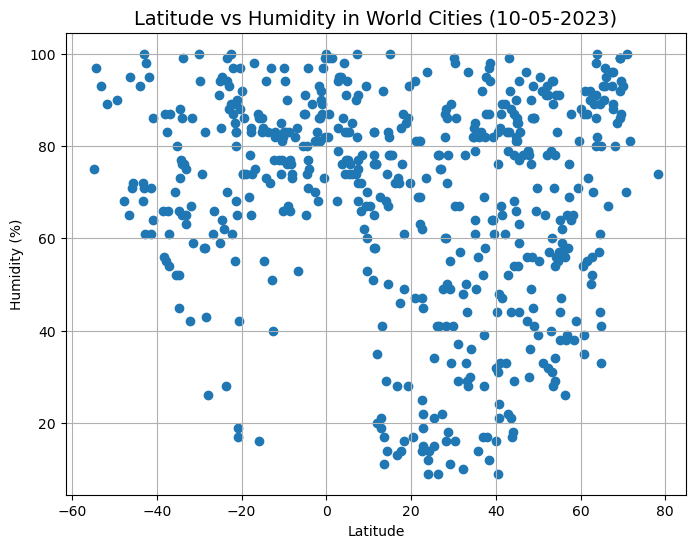

In [11]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Humidity in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

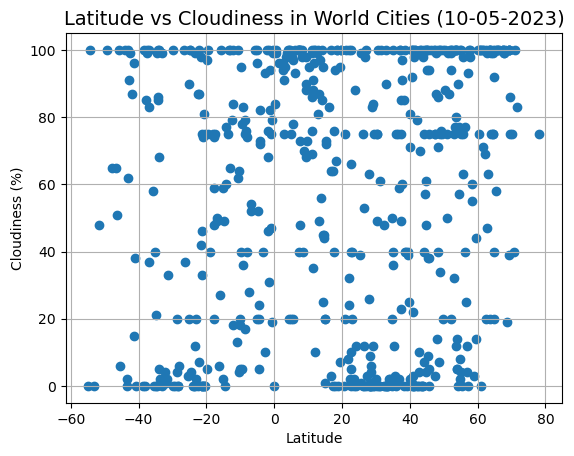

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph prop% erties
plt.title(f"Latitude vs Cloudiness in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

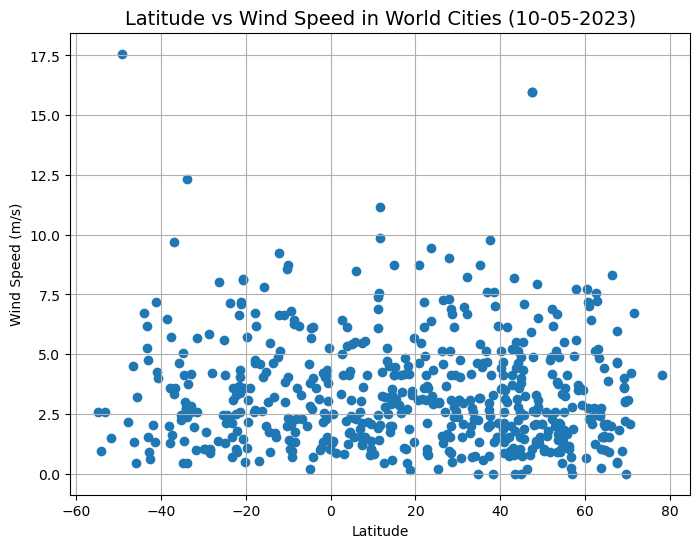

In [13]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Wind Speed in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4_Lat_windspeed.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [25]:
# Define a function to calc linear regresion and equation

def getLinRegress(x_values, y_values):
    
    # Get regression values
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    # get line equatlion for plotting
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    # print(line_eq)
                  
    return regress_values, line_eq, rvalue


In [47]:
# Define a fucntion to plot a scatter plot with a linear regression line and equation

def plotRegress(x_values, y_values, map_title, x_labls, y_labls, eq_x, eq_y, img_name):
    
    regress_vals, regress_eq, rval = getLinRegress(x_values, y_values)
    
    print(f"The r value is: {rval}")

    #Set the plot size
    plt.figure(figsize=(8, 6))

    # create the scatter plot
    plt.scatter(x_values, y_values, marker="o")

    # plot the regression line
    plt.plot(x_values, regress_vals, "r-")

    # Set the other plot properties

    plt.title(map_title, fontsize=14)
    plt.xlabel(x_labls)
    plt.ylabel(y_labls)
    plt.grid(True)

    # display the equation for the linear regression line
    plt.annotate(regress_eq, (eq_x, eq_y), fontsize=15, color="red")

    # Save the figure
    plt.savefig(f"output_data/{img_name}.png")

    # Show plot
    plt.show()


In [78]:
# Create a DataFrame with the northern hemisphere data (Latitude >= 0)

northern_cities_df = city_data_df[city_data_df["Lat"] >= 0]

# store northern hemisphere values to be used in multiple plots

northern_lats = northern_cities_df["Lat"]
northern_temps = northern_cities_df["Max Temp"]
northern_humidity = northern_cities_df["Humidity"]
northern_cloudiness = northern_cities_df["Cloudiness"]
northern_wind_speed = northern_cities_df["Wind Speed"]

# Display sample data
northern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.86,100,100,4.22,SJ,1683687798
1,bilibino,68.0546,166.4372,-2.51,80,100,1.84,RU,1683687798
2,eydhafushi,5.1033,73.0708,28.70,77,98,5.42,MV,1683687799
3,san luis de la loma,17.2706,-100.8939,27.75,72,0,1.08,MX,1683687636
9,st. john's,47.5649,-52.7093,4.98,79,75,15.95,CA,1683687214


In [79]:
# Create a DataFrame with the southern hemisphere data (Latitude < 0)

southern_cities_df = city_data_df[city_data_df["Lat"] < 0]

# store values to be used in multiple plots of southern hemisphere data

southern_lats = southern_cities_df["Lat"]
southern_temps = southern_cities_df["Max Temp"]
southern_humidity = southern_cities_df["Humidity"]
southern_cloudiness = southern_cities_df["Cloudiness"]
southern_wind_speed = southern_cities_df["Wind Speed"]

# Display sample data
southern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,ancud,-41.8697,-73.8203,10.80,95,87,2.02,CL,1683687799
5,chonchi,-42.6128,-73.8092,12.56,98,99,0.60,CL,1683687208
6,chimore,-16.9833,-65.1333,18.61,98,50,0.54,BO,1683687201
7,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683687800
8,adamstown,-25.0660,-130.1015,21.72,59,90,5.59,PN,1683687800


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8401604012274343


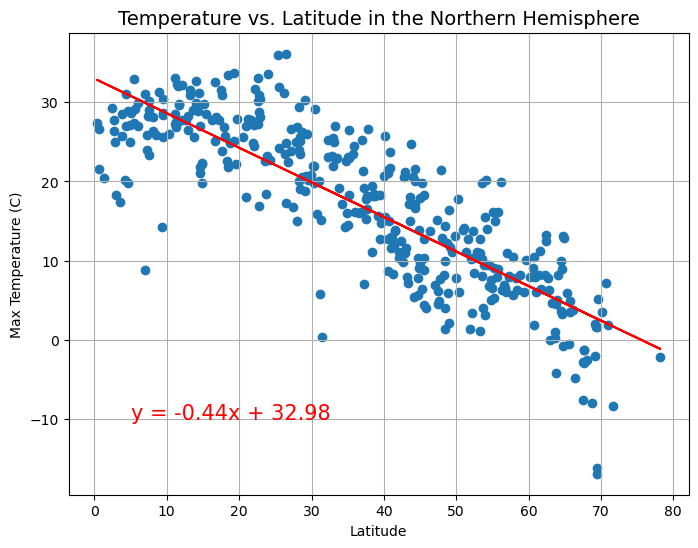

In [80]:
# Calc inear regression for Northern Hemisphere temperature and latitude

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(northern_lats, northern_temps)
print(f"The r value is: {rval}")

#Set the plot size
plt.figure(figsize=(8, 6))

# create the scatter plot
plt.scatter(northern_lats, northern_temps, marker="o")

# plot the regression line
plt.plot(northern_lats, regress_vals, "r-")

# Set the other plot properties

plt.title("Temperature vs. Latitude in the Northern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (5, -10), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/northern_lat_temp.png")

# Show plot
plt.show()


The r value is: -0.8401604012274343


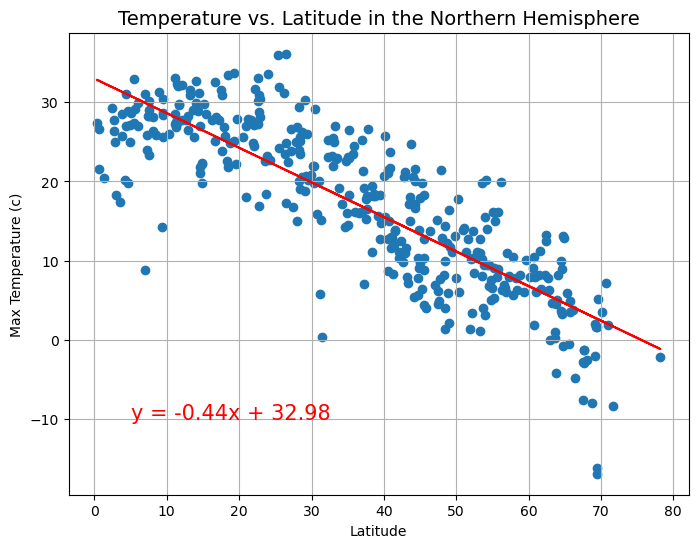

In [81]:
plotRegress(northern_lats, northern_temps, 
            "Temperature vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Max Temperature (c)", 5, -10, "northern_lat_temp")


The r value is: 0.7848876573529575


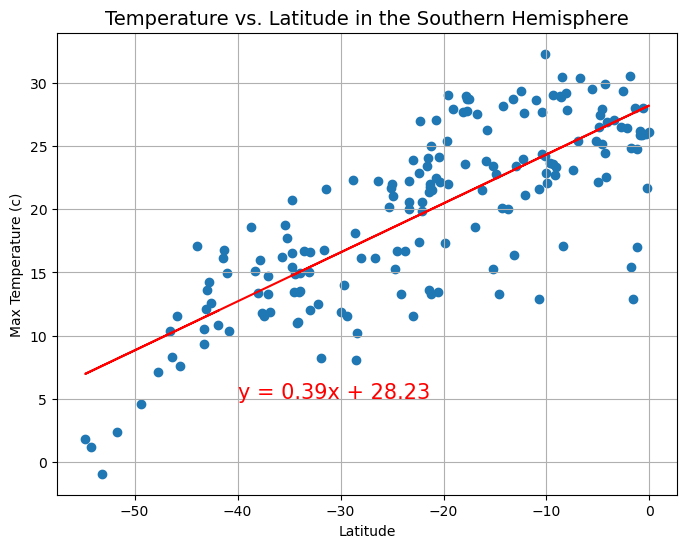

In [82]:
# Linear regression on Southern Hemisphere

# set plot size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(southern_lats, southern_temps)
print(f"The r value is: {rval}")

# create the scatter plot
plt.scatter(southern_lats, southern_temps, marker="o")

# plot the regression line
plt.plot(southern_lats, regress_vals, "r-")

# Set the other plot properties
plt.title("Temperature vs. Latitude in the Southern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (-40, 5), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/southern_lat_humidity.png")

# Show plot
plt.show()


The r value is: 0.7848876573529575


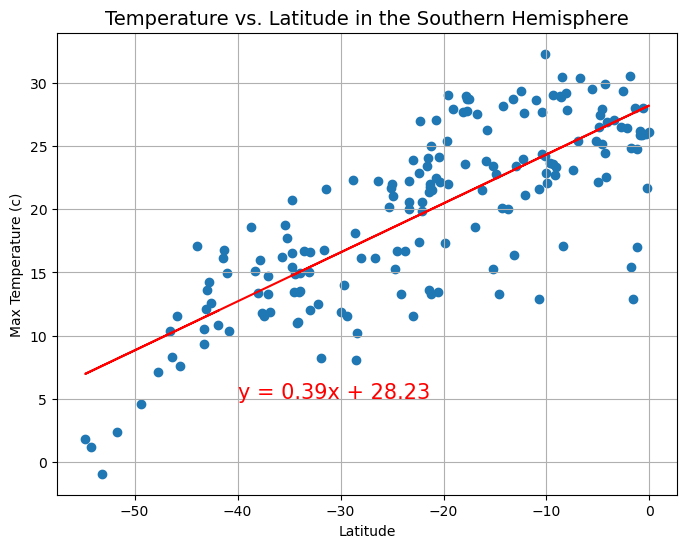

In [83]:
plotRegress(southern_lats, southern_temps, 
            "Temperature vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Max Temperature (c)", -40, 5, "southern_lat_temp")

#### Observations about the linear relationship between latitude and temperature:

In the northern hempisphere, temperature and latitude are strongly negatively correlated.  That is, tempertures increase as the latitude decreases towards zeros.  In the southern hemisphere, temperature and latitute are strongly positively correlated.  In other words, temperatures increase as the latitude increases towards zero.  In both cases, the r values are over 0.7.  

Overall, the two sets of linear regressions show that maximum temperatures are higher as one heads towards the equator, which has a latitutde of zero.  This seems intuitively obvious; the earth is not a perfect sphere and the circumference of the earth is largest at the equator.  The portion of the earth with the largest bulge towards the sun is overall hotter, and temperatures decrease as one moves toward the poles.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.08613541806744443


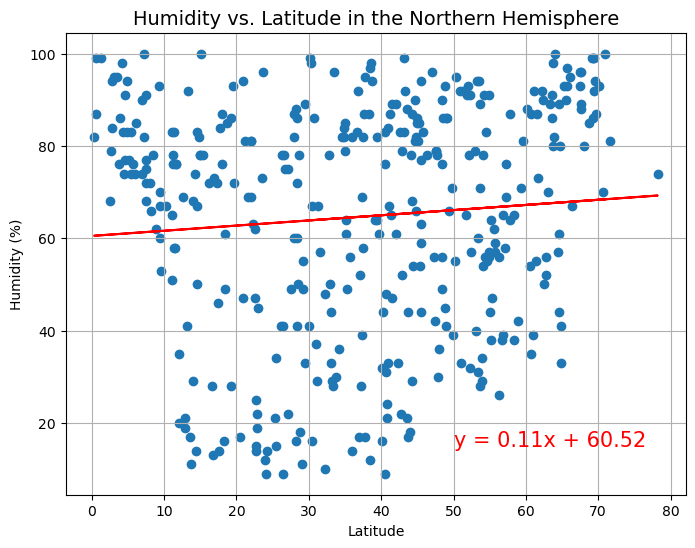

In [90]:
#  Plot humdiity vs latitude in the Northern Hemisphere

# set the plot size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(northern_lats, northern_humidity)

print(f"The r value is: {rval}")
      
# create the scatter plot
plt.scatter(northern_lats, northern_humidity, marker="o")

# plot the regression line
plt.plot(northern_lats, regress_vals, "r-")

# Set the other plot properties
plt.title("Humidity vs. Latitude in the Northern Hemisphere", fontsize=14)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (50, 15), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/northern_lat_Humidity.png")

# Show plot
plt.show()


The r value is: 0.08613541806744443


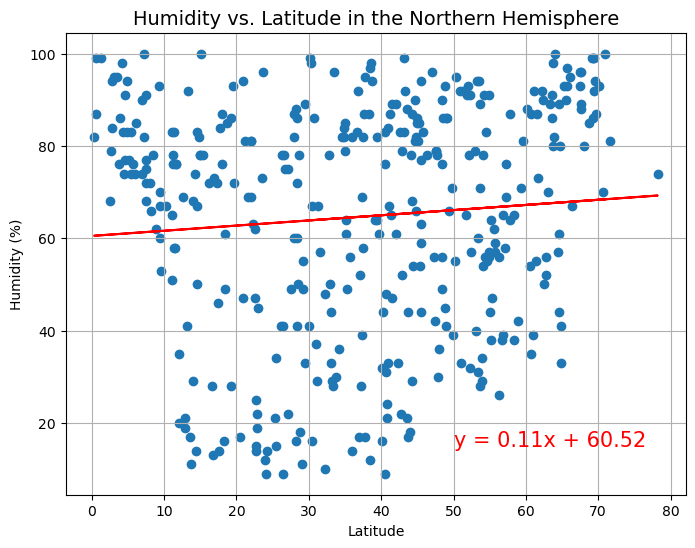

In [92]:
plotRegress(northern_lats, northern_humidity, 
            "Humidity vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Humidity (%)", 50, 15, "northern_lat_humidity")


The r value is: 0.13627036365151032)


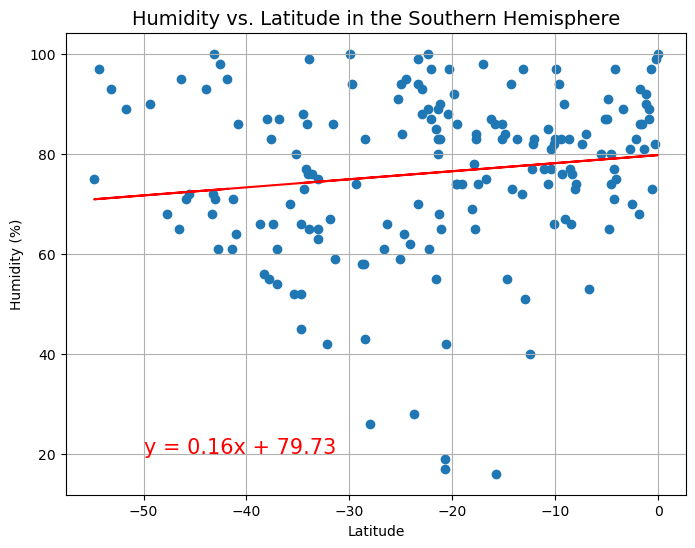

In [95]:
# Southern Hemisphere

# set figure size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(southern_lats, southern_humidity)
print(f"The r value is: {rval})")

# create the scatter plot
plt.scatter(southern_lats, southern_humidity, marker="o")

# plot the regression line
plt.plot(southern_lats, regress_vals, "r-")

# Set the other  graph properties
plt.title("Humidity vs. Latitude in the Southern Hemisphere", fontsize=14)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (-50, 20), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/southern_lat_Humidity.png")

# Show plot
plt.show()


The r value is: 0.13627036365151032


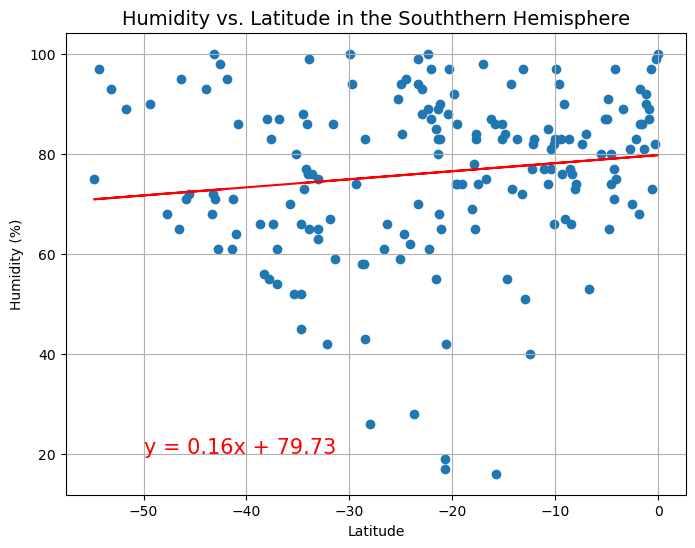

In [107]:
plotRegress(southern_lats, southern_humidity, 
            "Humidity vs. Latitude in the Souththern Hemisphere", 
            "Latitude", "Humidity (%)", -50, 20, "southern_lat_humidity")


#### Observations about the linear relationship between humidity and latitude

In the northern hempisphere

The countries which surround the equator in Africa, Gabon, Kenya, Uganda, Somallia, Republic of the Congo, and Democratic Republic of the Congo, have a larger land mass than the portions of Ecador, Columbia, and Brazil,  and the islands of Sao Tome and Principe, Kiribati, and Indonesia which are surround the equator.  While Kenya and Uganda have some forests, they also comprise a large amount of drier savannahs as well as deserts, whereas the island nations and the portions of South America that lie on the equator are rain forest.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.034163203096381926


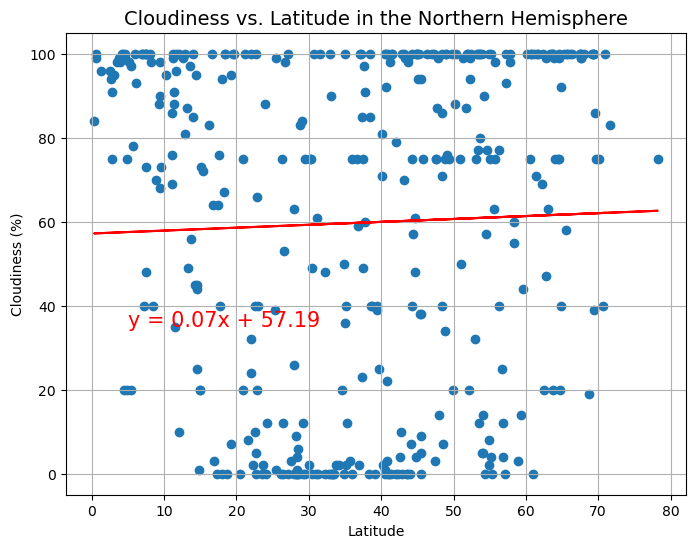

In [102]:
#  Plot cloudiness vs latitude in the Northern Hemisphere

# set figure size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq , rval = getLinRegress(northern_lats, northern_cloudiness)
print(f"The r value is: {rval}")

# create the scatter plot
plt.scatter(northern_lats, northern_cloudiness, marker="o")

# plot the regression line
plt.plot(northern_lats, regress_vals, "r-")

# Set the other graph properties
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (5, 35), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/northern_lat_cloud.png")

# Show plot
plt.show()


The r value is: 0.034163203096381926


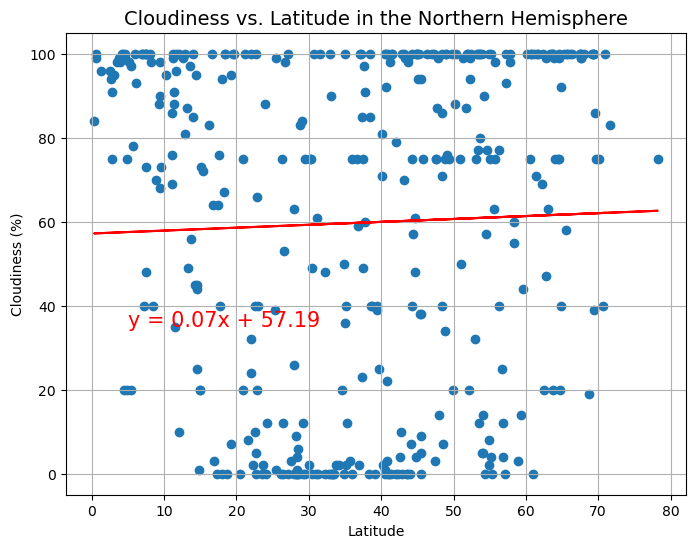

In [108]:
plotRegress(northern_lats, northern_cloudiness, 
            "Cloudiness vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Cloudiness (%)", 5, 35, "northern_lat_cloud")


The r value is: 0.08472237998445445


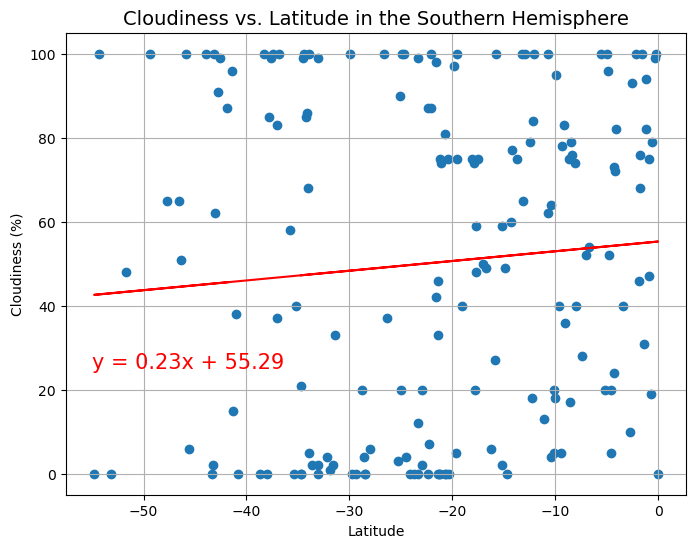

In [110]:
#  Plot cloudiness vs latitude in the Southern Hemisphere

# Set figure size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(southern_lats, southern_cloudiness)
print(f"The r value is: {rval}")

# create the scatter plot
plt.scatter(southern_lats, southern_cloudiness, marker="o")

# plot the regression line
plt.plot(southern_lats, regress_vals, "r-")

# Set the other  graph properties
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (-55, 25), fontsize=15,  color="red")

# Save the figure
plt.savefig("output_data/southern_lat_cloud.png")

# Show plot
plt.show()


The r value is: 0.08472237998445445


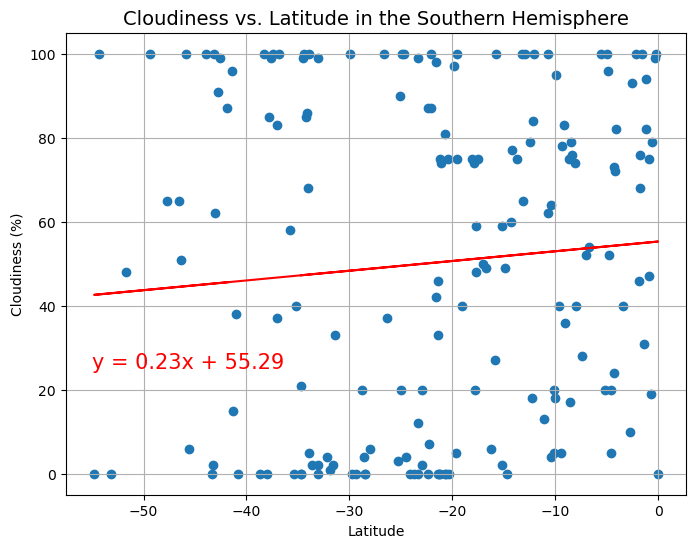

In [113]:
plotRegress(southern_lats, southern_cloudiness, 
            "Cloudiness vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Cloudiness (%)", -55, 25, "southern_lat_cloud")


#### Observations about the linear relationship between cloudiness and latitude

There is no correlation between cloudiness and latitude.  The r values are less than .1 for both hemispheres, and the linear regression lines are almost flat.  This is inherently logical, as cloudiness, like humidity, is much more likely tied to elevation, water bodies, and the regional flora than to latutidue.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.046900381448136685


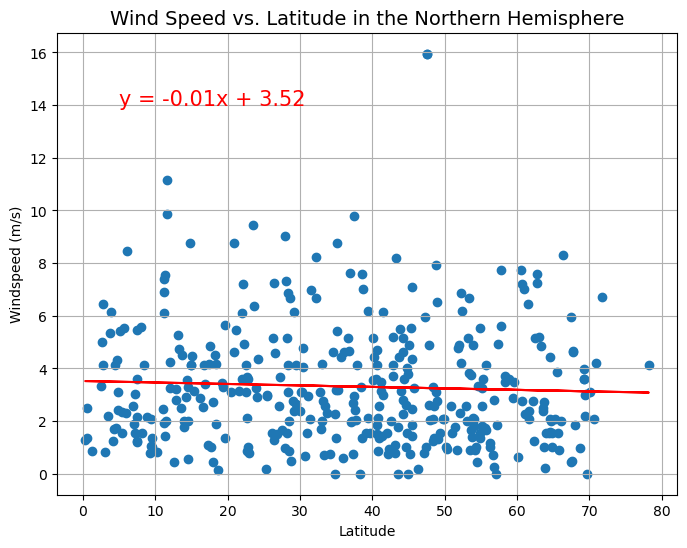

In [117]:
# Wind Speed versus latitutde in the Northern Hemisphere

# Set figure size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(northern_lats, northern_wind_speed)
print(f"The r value is: {rval}")

# create the scatter plot
plt.scatter(northern_lats, northern_wind_speed, marker="o")

# plot the regression line
plt.plot(northern_lats, regress_vals, "r-")

# Set the other  graph properties
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (5, 14), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/northern_lat_wind.png")

# Show plot
plt.show()

The r value is: -0.046900381448136685


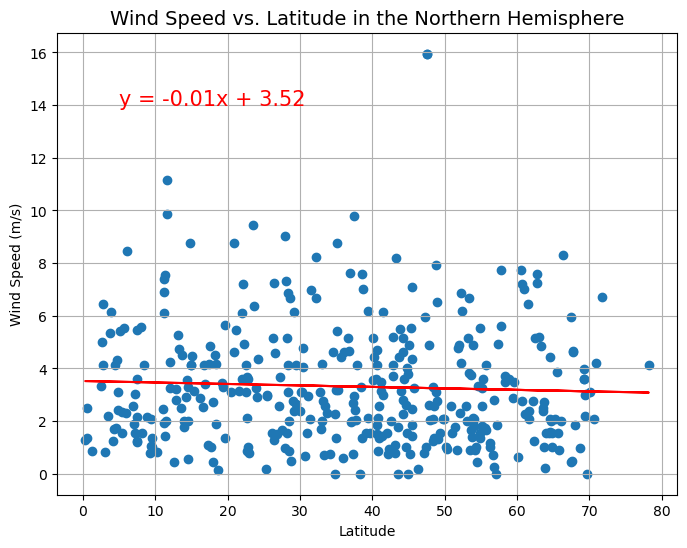

In [120]:
# Northern Hemisphere:   Wind Speed and Latitutde

plotRegress(northern_lats, northern_wind_speed, 
            "Wind Speed vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Wind Speed (m/s)", 5, 14, "northern_lat_wind")



The r value is: -0.024589032964787497


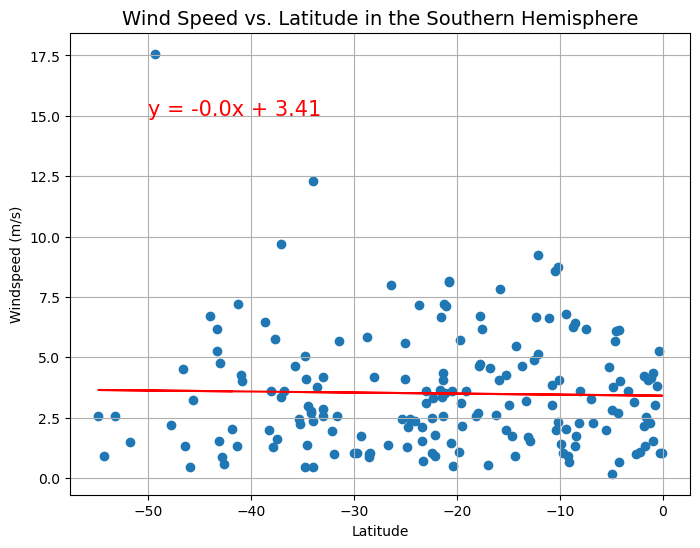

In [122]:
# Set figure size
plt.figure(figsize=(8, 6))

# get the linear regression line and equation

regress_vals, regress_eq, rval = getLinRegress(southern_lats, southern_wind_speed)
print(f"The r value is: {rval}")

# create the scatter plot
plt.scatter(southern_lats, southern_wind_speed, marker="o")

# plot the regression line
plt.plot(southern_lats, regress_vals, "r-")

# Set the other  graph properties
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid(True)

# display the equation for the linear regression line
plt.annotate(regress_eq, (-50, 15), fontsize=15, color="red")

# Save the figure
plt.savefig("output_data/southern_lat_wind.png")

# Show plot
plt.show()

The r value is: -0.024589032964787497


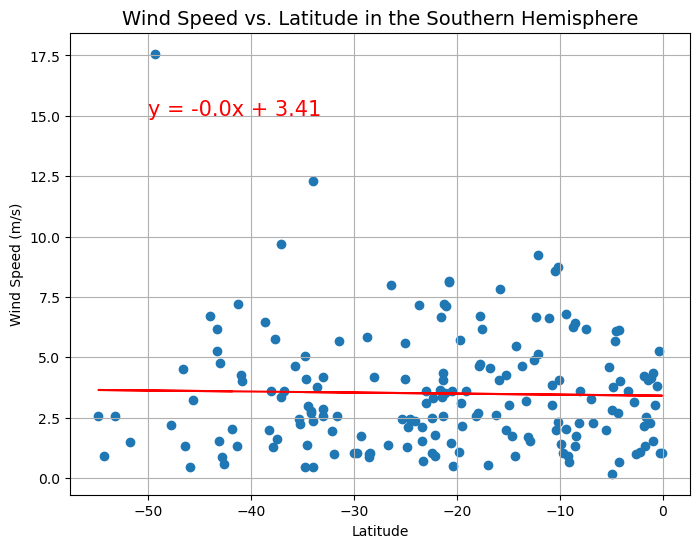

In [125]:
# Southern Hemisphere

plotRegress(southern_lats, southern_wind_speed, 
            "Wind Speed vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Wind Speed (m/s)", -50, 15, "southern_lat_wind")


#### Observations about the linear relationship between wind speed and latitude

In the northern hempisphere